In [8]:
from local_tree_decomp import *

# from local_helpers import *
from help_functions import *

# from local_hom_count import *
# from local_hom_count_int import *
from local_hom_count_best import *
# from local_hom_count_int_dict import *

# from hom_count_bounded_degree import *


In [7]:
graph = graphs.CompleteBipartiteGraph(1, 4)
target_graph = graphs.CompleteGraph(5)

count_homomorphisms_int_pre(graph, target_graph)

1280

In [8]:
graph = graphs.CompleteBipartiteGraph(1, 4)
# target_graph = graphs.CompleteGraph(8)

random_graph = graphs.RandomGNP(10, 0.1, seed=42)

%timeit count_homomorphisms_bounded_degree(graph, random_graph)

363 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit count_homomorphisms(graph, random_graph)

16.7 ms ± 787 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%load_ext line_profiler

from hom_count_bounded_degree import is_traversal_homomorphism, count_homomorphisms_helper

%lprun -f count_homomorphisms_helper count_homomorphisms_bounded_degree(graph, target_graph)

In [ ]:
def speed_test(graph, target_graph, naive=True):
    basic_result = count_homomorphisms(graph, target_graph)
    int_rep_result = count_homomorphisms_int(graph, target_graph)
    better_int_rep_result = count_homomorphisms_int_pre(graph, target_graph)
    dict_int_rep_result = count_homomorphisms_int_dict(graph, target_graph)

    results = [basic_result, int_rep_result, better_int_rep_result, dict_int_rep_result]

    if naive:
        brute_force_result = len(enumerate_homomorphisms(graph, target_graph))
        results.append(brute_force_result)

    if all(result == better_int_rep_result for result in results):
        print('result:', better_int_rep_result)

        if naive:
            print('\nBrute force:')
            %timeit len(enumerate_homomorphisms(graph, target_graph))
        
        print('\nBasic:')
        %timeit count_homomorphisms(graph, target_graph)
        
        print('\nInt representation:')
        %timeit count_homomorphisms_int(graph, target_graph)
    
        print('\nBetter int representation:')
        %timeit count_homomorphisms_int_pre(graph, target_graph)

        print('\nDict int representation:')
        %timeit count_homomorphisms_int_dict(graph, target_graph)


In [13]:
count_homomorphisms_int(graph, random_graph)

276

In [12]:
count_homomorphisms_bounded_degree(graph, random_graph)

276

In [5]:
K3 = graphs.CompleteGraph(3)
for i in K3.vertices():
    print(i)

0
1
2


In [11]:
g = graphs.CycleGraph(4)

tree_decomp = g.treewidth(certificate=True)
nice_tree_decomp = make_nice_tree_decomposition(g, tree_decomp)
root = sorted(nice_tree_decomp)[0]
dir_labelled_TD = label_nice_tree_decomposition(nice_tree_decomp, root, directed=True)

In [14]:
for i in dir_labelled_TD.vertices():
    print(i, dir_labelled_TD.get_vertex(i))

(0, {}) forget
(1, {0}) forget
(2, {0, 1}) forget
(3, {0, 1, 3}) intro
(4, {1, 3}) forget
(5, {1, 2, 3}) intro
(6, {2, 3}) intro
(7, {3}) intro
(8, {}) leaf


In [17]:
dir_labelled_TD.edges(labels=False)

[((0, {}), (1, {0})), ((1, {0}), (2, {0, 1})), ((2, {0, 1}), (3, {0, 1, 3})), ((3, {0, 1, 3}), (4, {1, 3})), ((4, {1, 3}), (5, {1, 2, 3})), ((5, {1, 2, 3}), (6, {2, 3})), ((6, {2, 3}), (7, {3})), ((7, {3}), (8, {}))]

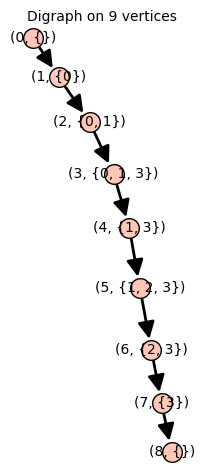

In [18]:
dir_labelled_TD

In [19]:
dir_labelled_TD.vertices()

[(0, {}),
 (1, {0}),
 (2, {0, 1}),
 (3, {0, 1, 3}),
 (4, {1, 3}),
 (5, {1, 2, 3}),
 (6, {2, 3}),
 (7, {3}),
 (8, {})]

In [20]:
node_changes(dir_labelled_TD)

{0: 0, 1: 1, 2: 3, 3: 0, 4: 2, 5: 1, 6: 2, 7: 3}